In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
dataframe = pd.read_csv ('Stroke_Risk_Prediction.csv')

In [10]:
import io

In [11]:
dataframe.shape

(5110, 12)

In [12]:
dataframe.shape

(5110, 12)

In [13]:
dataframe.head()

,id,gender,age,hypertension,hdisease,evrmarried,work,Residence,glucose,bmi,smoking,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
dataframe = dataframe.drop('id', axis=1)

dataframe.head()

,gender,age,hypertension,hdisease,evrmarried,work,Residence,glucose,bmi,smoking,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
dataframe[dataframe==0].count()

gender             0
age                0
hypertension    4612
hdisease        4834
evrmarried         0
work               0
Residence          0
glucose            0
bmi                0
smoking            0
stroke          4861
dtype: int64

In [16]:
dataframe['bmi'].fillna(dataframe['bmi'].mean(), inplace= True)

In [17]:
dataframe['smoking'].fillna(dataframe['smoking'].mode()[0], inplace=True)

In [18]:
dataframe.describe()

,age,hypertension,hdisease,glucose,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        5110 non-null   object 
 1   age           5110 non-null   float64
 2   hypertension  5110 non-null   int64  
 3   hdisease      5110 non-null   int64  
 4   evrmarried    5110 non-null   object 
 5   work          5110 non-null   object 
 6   Residence     5110 non-null   object 
 7   glucose       5110 non-null   float64
 8   bmi           5110 non-null   float64
 9   smoking       5110 non-null   object 
 10  stroke        5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [20]:
pd.pivot_table(dataframe, index= 'stroke', columns='gender', values='evrmarried', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


In [21]:
pd.pivot_table(dataframe, index= 'stroke', columns='gender', values='hypertension', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


In [22]:
pd.pivot_table(dataframe, index= 'stroke', columns='gender', values='hdisease', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


In [23]:
pd.pivot_table(dataframe, index= 'stroke', columns='work', values='smoking', aggfunc= 'count')

work,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624.0,22.0,2776.0,754.0,685.0
1,33.0,NaN,149.0,65.0,2.0


In [24]:
dataframe['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [25]:
from sklearn import preprocessing 

encoder = preprocessing.LabelEncoder()

for i in dataframe.columns:
    if isinstance(dataframe[i][0], str):
            dataframe[i] = encoder.fit_transform(dataframe[i])

In [26]:
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
scalar.fit(dataframe) 
scaled_data = scalar.transform(dataframe)

In [27]:
dataframe.head(10)

,gender,age,hypertension,hdisease,evrmarried,work,Residence,glucose,bmi,smoking,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [28]:
 
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 4088 samples for training and 1022 for validation


In [29]:

def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("stroke")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [30]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'gender': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'age': <tf.Tensor: shape=(), dtype=float64, numpy=78.0>, 'hypertension': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'hdisease': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'evrmarried': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'work': <tf.Tensor: shape=(), dtype=int32, numpy=2>, 'Residence': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'glucose': <tf.Tensor: shape=(), dtype=float64, numpy=67.29>, 'bmi': <tf.Tensor: shape=(), dtype=float64, numpy=24.6>, 'smoking': <tf.Tensor: shape=(), dtype=int32, numpy=2>}
Target: tf.Tensor(1, shape=(), dtype=int64)


In [31]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [32]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    normalizer = Normalization()

    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    normalizer.adapt(feature_ds)
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    index = StringLookup()

    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    index.adapt(feature_ds)

    encoded_feature = index(feature)

    encoder = CategoryEncoding(output_mode="binary")

    feature_ds = feature_ds.map(index)
    encoder.adapt(feature_ds)

    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):
    encoder = CategoryEncoding(output_mode="binary")

    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    encoder.adapt(feature_ds)

    encoded_feature = encoder(feature)
    return encoded_feature


In [35]:

hypertension = keras.Input(shape=(1,), name="hypertension", dtype="int64")
hdisease = keras.Input(shape=(1,), name="hdisease", dtype="int64")
gender = keras.Input(shape=(1,), name="gender", dtype="int64")
evrmarried = keras.Input(shape=(1,), name="evrmarried", dtype="int64")
work = keras.Input(shape=(1,), name="work", dtype="int64")
Residence = keras.Input(shape=(1,), name="Residence", dtype="int64")
smoking = keras.Input(shape=(1,), name="smoking", dtype="int64")


age = keras.Input(shape=(1,), name="age")
glucose = keras.Input(shape=(1,), name="glucose")
bmi = keras.Input(shape=(1,), name="bmi")

all_inputs = [
  
    hypertension,
    hdisease,
    gender,
    evrmarried,
    work,
    Residence,
    smoking,
   #id,
    age,
    glucose,
    bmi,
]

hypertension_encoded = encode_integer_categorical_feature(hypertension, "hypertension", train_ds)
hdisease_encoded = encode_integer_categorical_feature(hdisease, "hdisease", train_ds)
gender_encoded = encode_integer_categorical_feature(gender, "gender", train_ds)
evrmarried_encoded = encode_integer_categorical_feature(evrmarried, "evrmarried", train_ds)
work_encoded = encode_integer_categorical_feature(work, "work", train_ds)
Residence_encoded = encode_integer_categorical_feature(Residence, "Residence", train_ds)
smoking_encoded = encode_integer_categorical_feature(smoking, "smoking", train_ds)

age_encoded = encode_numerical_feature(age, "age", train_ds)
glucose_encoded = encode_numerical_feature(glucose, "glucose", train_ds)
bmi_encoded = encode_numerical_feature(bmi, "bmi", train_ds)

all_features = layers.concatenate(
    [
        hypertension_encoded,
        hdisease_encoded, 
        gender_encoded,
        evrmarried_encoded,     
        work_encoded,
        Residence_encoded,  
        smoking_encoded,
        age_encoded,
        glucose_encoded,
        bmi_encoded,
     
    ]
)
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

ValueError: num_tokens must be set to use this layer. If the number of tokens is not known beforehand, use the IntegerLookup layer instead.

In [34]:
 keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

NameError: name 'model' is not defined

In [ ]:
import matplotlib.pyplot as plt

Epoch 1/10
128/128 [==============================] - 0s 4ms/step - loss: 0.2523 - accuracy: 0.9381 - val_loss: 0.1609 - val_accuracy: 0.9569
Epoch 2/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9499 - val_loss: 0.1524 - val_accuracy: 0.9569
Epoch 3/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9496 - val_loss: 0.1498 - val_accuracy: 0.9569
Epoch 4/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9499 - val_loss: 0.1481 - val_accuracy: 0.9569
Epoch 5/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9499 - val_loss: 0.1472 - val_accuracy: 0.9569
Epoch 6/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9496 - val_loss: 0.1461 - val_accuracy: 0.9569
Epoch 7/10
128/128 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.9499 - val_loss: 0.1466 - val_accuracy: 0.9569
Epoch 

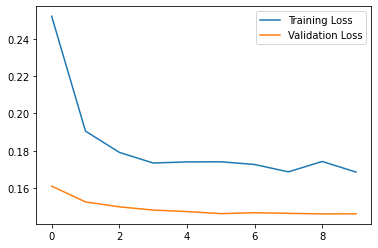

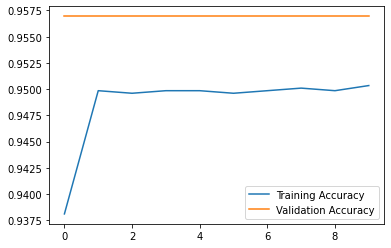

In [ ]:
history = model.fit(train_ds,epochs=10, validation_data=val_ds)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
sample = {
    
    "gender": 1,
    "age": 17,
    "hypertension": 0,
    "hdisease": 1,
    "evrmarried": 1,
    "work": 1,
    "Residence": 1,
    "glucose": 228.69,
    "bmi": 36.6,
    "smoking": 1,

}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(100*predictions[0][0])

print(
    "This particular patient had a %.1f percent probability "
    "of having a stroke risk." % (100 * predictions[0][0])
)


2.418363094329834
This particular patient had a 2.4 percent probability of having a stroke risk.


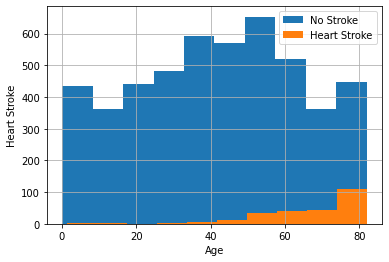

In [ ]:
stroke = dataframe
stroke.loc[stroke['stroke'] == 0,
                 'age'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,
                 'age'].hist(label='Heart Stroke')
plt.xlabel('Age')
plt.ylabel('Heart Stroke')
plt.legend()

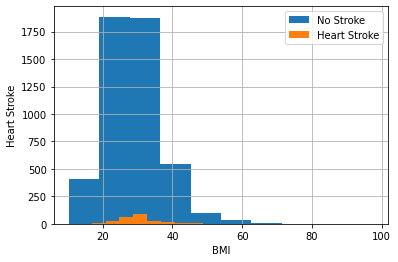

In [ ]:
stroke.loc[stroke['stroke'] == 0,
                 'bmi'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,
                 'bmi'].hist(label='Heart Stroke')
plt.xlabel('BMI')
plt.ylabel('Heart Stroke')
plt.legend()

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

<Figure size 2016x1440 with 0 Axes>

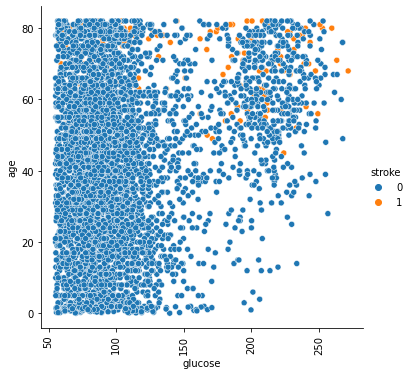

In [ ]:
import seaborn as sns
plt.figure(figsize=(28,20))
sns.relplot(x= 'glucose', y='age', hue= 'stroke', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

In [ ]:
X= stroke.drop('stroke', axis=1)
X.shape

(5110, 10)

In [ ]:
y= stroke['stroke']
y.shape

(5110,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state = 1000)

In [ ]:
log= LogisticRegression()

In [ ]:
log.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log.score(X_train, y_train)

0.9530332681017613

In [ ]:
stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
stroke_copy= stroke.copy()

In [ ]:
stroke_copy.head()

,gender,age,hypertension,hdisease,evrmarried,work,Residence,glucose,bmi,smoking,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
li = list(stroke_copy[stroke_copy.stroke == 0].sample(n=4180).index)

In [ ]:
X_drop= stroke_copy.drop('stroke', axis=1)
X_drop.shape

(5110, 10)

In [ ]:
y_drop= stroke_copy.stroke
y_drop.shape

(5110,)

In [ ]:
X_droptr,X_dropts,y_droptr,y_dropts = train_test_split(X_drop,y_drop,test_size=.3, random_state = 1000)

In [ ]:
log.score(X_droptr, y_droptr)

0.9530332681017613

In [ ]:
y_underlog= log.predict(X_dropts)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, recall_score, confusion_matrix
cm_log= confusion_matrix(y_dropts, y_underlog)

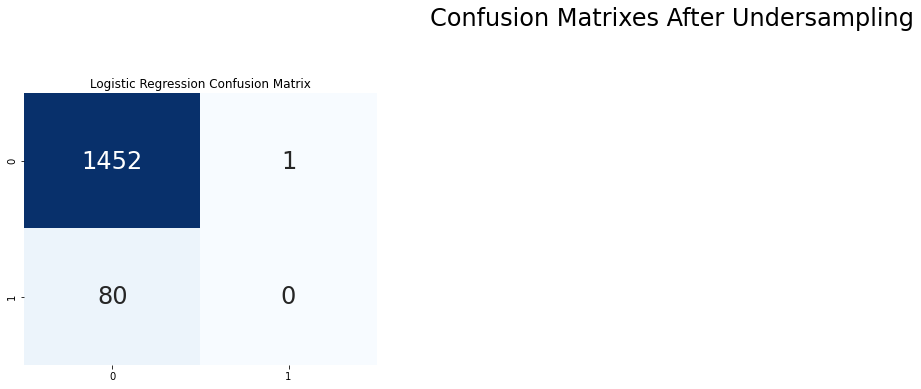

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes After Undersampling",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_log,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})